In [1]:
from keras.preprocessing import image
import numpy as np

# load an image

size: (225, 225)


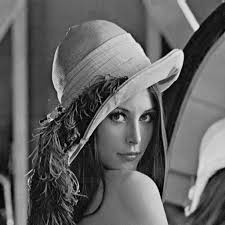

In [4]:
lena_img = image.load_img('./lena.jpeg')
print("size:",lena_img.size)
lena_img

# 轉成 numpy array

In [73]:
lena_arr =image.img_to_array(lena_img)
print("shape:",lena_arr.shape)
print("type:",type(lena_arr))

shape: (225, 225, 3)
type: <class 'numpy.ndarray'>


# 為了方便把陣列轉成二維的

In [8]:
lena_gray_arr = lena_arr[:,:,1]
lena_gray_arr.shape

(225, 225)

# 自己寫的filter function

In [62]:
def get_martix(arr, i, j, filter_size, padding='zero'):
    result = np.zeros(filter_size)
    for y in range(result.shape[1]):
        for x in range(result.shape[0]):
            data = 0
            new_i = int((i - (filter_size[0] - 1) / 2) + x)
            new_j = int((j - (filter_size[1] - 1) / 2) + y)
            if padding == 'zero':
                if new_i < 0 or new_i >= arr.shape[0] or new_j < 0 or new_j >= arr.shape[1]:
                    data = 0
                else:
                    data = arr[new_i, new_j]
                    
            if padding == 'same':
                if new_i < 0:
                    new_i =0
                if new_i >= arr.shape[0]:
                    new_i = arr.shape[0] -1
                    
                if new_j < 0:
                    new_j = 0
                if new_j >= arr.shape[1]:
                    new_j = arr.shape[1] -1
                    
                data =arr[new_i,new_j]
                    
                
            result[x, y] = data
    return result


def filter(arr, function, filter_size=(3, 3),padding='zero'):
    result = np.zeros(arr.shape)
    for j in range(arr.shape[1]):
        for i in range(arr.shape[0]):
            m = get_martix(arr,i,j,filter_size,padding)
            data = function(m)
            result[i,j] = data
    return result

## demo 一下功能
根據i,j位置把圖片周圍的資料取出來，比較需要特別說明的就是padding

如果是zero超出圖像位置之外的用0補

same的話就是周圍相同的補


In [75]:
get_martix(lena_gray_arr,3,3,(3,3))

array([[ 133.,  133.,  133.],
       [ 132.,  132.,  132.],
       [ 131.,  131.,  131.]])

In [76]:
get_martix(lena_gray_arr,0,0,(3,3))

array([[   0.,    0.,    0.],
       [   0.,  135.,  135.],
       [   0.,  134.,  134.]])

In [77]:
get_martix(lena_gray_arr,0,0,(3,3),padding='same')

array([[ 135.,  135.,  135.],
       [ 135.,  135.,  135.],
       [ 134.,  134.,  134.]])

# 濾波器
可以參考這篇[文章](https://homepages.inf.ed.ac.uk/rbf/HIPR2/filtops.htm)，有需多個，我們實作一個就好

這個我們時做的是mean filter

比較一下，發現他比較模糊

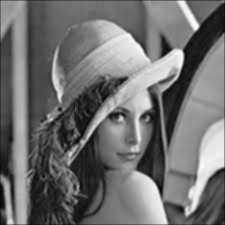

In [83]:
def mean_filter(m):
    mean_matrix = np.ones((3,3))*1/9
    return np.sum(m*mean_matrix)/9

image.array_to_img(filter(lena_gray_arr,mean_filter,(3,3)).reshape(225,225,1))

# 原圖

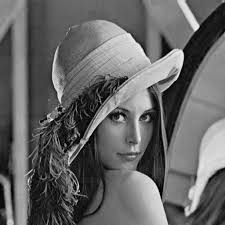

In [79]:
def origin(m):
    return m[1,1]

image.array_to_img(filter(lena_gray_arr,origin,(3,3)).reshape(225,225,1))

# threshold
這邊比較特別的是這個

如果值大於150的話就變成255，其餘則是0

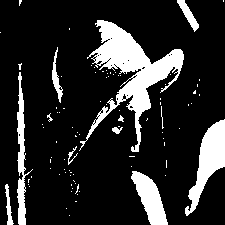

In [80]:
def threshold150(m):
    return 255 if m[1,1]>150 else 0

image.array_to_img(filter(lena_gray_arr,threshold150,(3,3)).reshape(225,225,1))